In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('datasets/Birthweight_reduced_kg_R.csv')
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [3]:
df.shape

(42, 16)

In [4]:
df.isnull().sum()

ID             0
Length         0
Birthweight    0
Headcirc       0
Gestation      0
smoker         0
mage           0
mnocig         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,42.0,894.071429,467.616186,27.00,537.25,821.000,1269.5000,1764.00
Length,42.0,51.333333,2.935624,43.00,50.00,52.000,53.0000,58.00
Birthweight,42.0,3.312857,0.603895,1.92,2.94,3.295,3.6475,4.57
Headcirc,42.0,34.595238,2.399792,30.00,33.00,34.000,36.0000,39.00
Gestation,42.0,39.190476,2.643336,33.00,38.00,39.500,41.0000,45.00
smoker,42.0,0.523810,0.505487,0.00,0.00,1.000,1.0000,1.00
mage,42.0,25.547619,5.666342,18.00,20.25,24.000,29.0000,41.00
mnocig,42.0,9.428571,12.511737,0.00,0.00,4.500,15.7500,50.00
mheight,42.0,164.452381,6.504041,149.00,161.00,164.500,169.5000,181.00
mppwt,42.0,57.500000,7.198408,45.00,52.25,57.000,62.0000,78.00


In [6]:
df.smoker.value_counts()

1    22
0    20
Name: smoker, dtype: int64

<AxesSubplot:xlabel='Birthweight', ylabel='Count'>

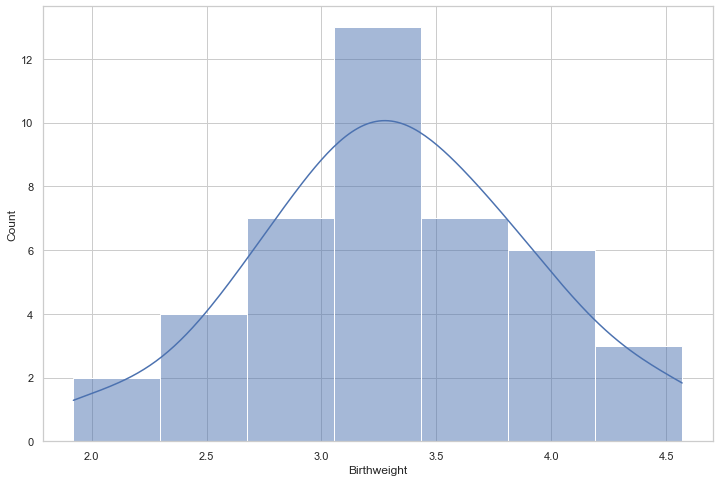

In [7]:
plt.figure(figsize= (12, 8))

sns.histplot(df.Birthweight, kde=True)

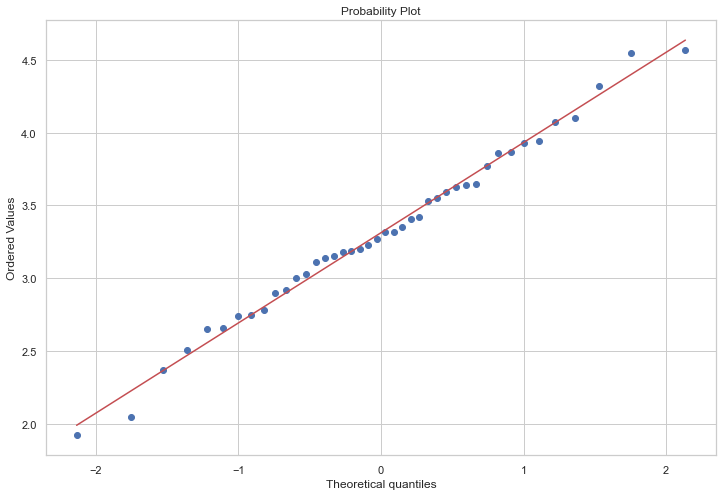

In [8]:
plt.figure(figsize= (12, 8))
stats.probplot(df.Birthweight, plot=plt, dist="norm");

In [14]:
print('T-test does not require data to be normally distributed. It only assumes that the means of samples are normally distributed.')
print('Null Hypothesis: Birthweight is normally distributed')
if stats.shapiro(df.Birthweight).pvalue > 0.05:
    print("Birthweight is normally distributed with a p-value of: ", round(stats.shapiro(df.Birthweight).pvalue, 2))
else:
    print("Birthweight is not normally distributed with a p-value of: ", round(stats.shapiro(df.Birthweight).pvalue, 2))

T-test does not require data to be normally distributed. It only assumes that the means of samples are normally distributed.
Null Hypothesis: Birthweight is normally distributed
Birthweight is normally distributed with a p-value of:  0.97


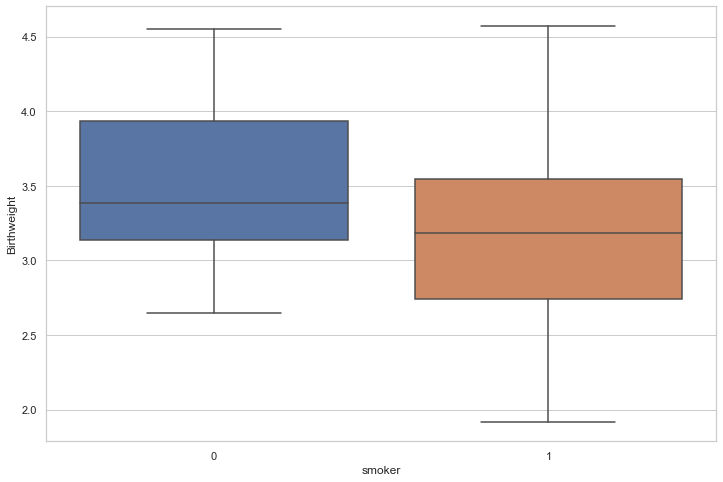

In [15]:
plt.figure(figsize= (12, 8))
sns.boxplot(data=df, x='smoker', y='Birthweight')
plt.show();

In [16]:
sample_1 = df[df.smoker == 0]
sample_2 = df[df.smoker == 1]
print(sample_1.shape, sample_2.shape)

(20, 16) (22, 16)


In [26]:
sample_2 = sample_2.sample(20)

In [27]:
print(sample_1.shape, sample_2.shape)

(20, 16) (20, 16)


In [28]:
# T-test asumes homogeneity of variances. Levene test is used to check for homogeneity of variances.
print("Null hypothesis: samples have same variances")
p = stats.levene(sample_1.Birthweight, sample_2.Birthweight).pvalue
if p > 0.05:
    print("Samples have same variances with a p-value of: ", round(p, 2))
else:
    print("Samples do not have same variances with a p-value of: ", round(p, 2))

Null hypothesis: samples have same variances
Samples have same variances with a p-value of:  0.67


In [30]:
print("Null hypothesis: samples have same means")
p = stats.ttest_ind(sample_1.Birthweight, sample_2.Birthweight).pvalue
if p > 0.05:
    print("Samples have same means with a p-value of: ", round(p, 2))
else:
    print("Samples do not have same means with a p-value of: ", round(p, 2))

Null hypothesis: samples have same means
Samples have same means with a p-value of:  0.07


<AxesSubplot:xlabel='Headcirc', ylabel='Count'>

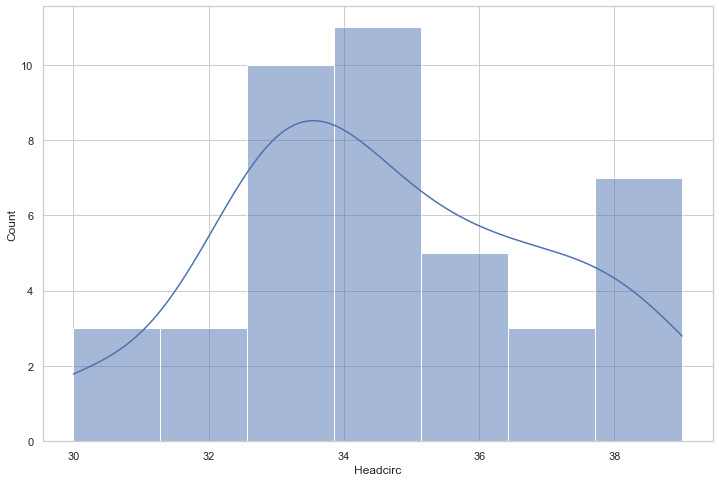

In [31]:
plt.figure(figsize= (12, 8))
sns.histplot(df.Headcirc, kde=True)

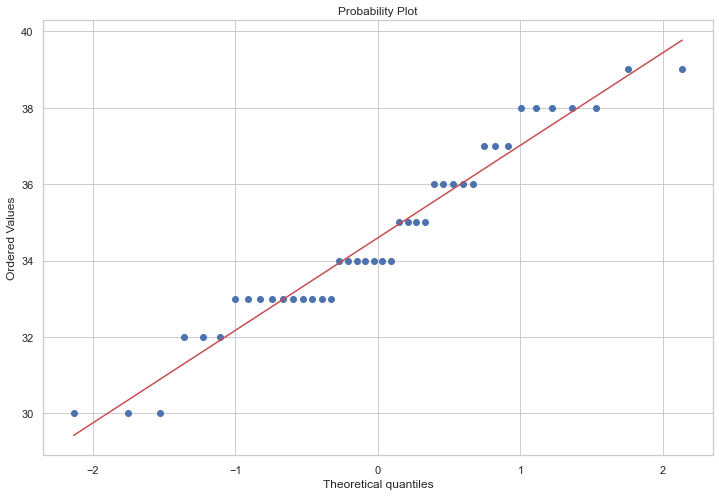

In [32]:
plt.figure(figsize= (12, 8))
stats.probplot(df.Headcirc, plot=plt, dist="norm");

In [33]:
p = stats.shapiro(df.Headcirc).pvalue
print("Null hypothesis: Headcirc is normally distributed")
if p > 0.05:
    print("Headcirc is normally distributed with a p-value of: ", round(p, 2))
else:
    print("Headcirc is not normally distributed with a p-value of: ", round(p, 2))

Null hypothesis: Headcirc is normally distributed
Headcirc is normally distributed with a p-value of:  0.07


<AxesSubplot:xlabel='smoker', ylabel='Headcirc'>

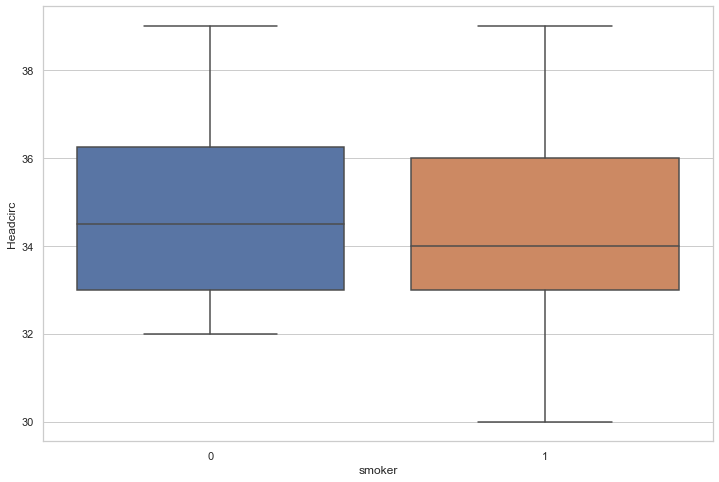

In [34]:
plt.figure(figsize= (12, 8))
sns.boxplot(data=df, x='smoker', y='Headcirc')

In [35]:
print("Null hypothesis: Both groups have same variances")
p = stats.levene(sample_1.Headcirc, sample_2.Headcirc).pvalue
if p > 0.05:
    print("Both groups have same variances with a p-value of: ", round(p, 2))
else:
    print("Both groups do not have same variances with a p-value of: ", round(p, 2))

Null hypothesis: Both groups have same variances
Both groups have same variances with a p-value of:  0.57


In [36]:
print("Null hypothesis: Both groups have same means")
p = stats.ttest_ind(sample_1.Headcirc, sample_2.Headcirc).pvalue
if p > 0.05:
    print("Both groups have same means with a p-value of: ", round(p, 2))
else:
    print("Both groups do not have same means with a p-value of: ", round(p, 2))

Null hypothesis: Both groups have same means
Both groups have same means with a p-value of:  0.21
